In [ ]:
'''What is Training Data?
Machine learning uses algorithms to learn from data in datasets. They find patterns, develop understanding, make decisions, 
and evaluate those decisions. 

In machine learning, datasets are split into two subsets. 

The first subset is known as the training data - it’s a portion of our actual dataset that is fed into the machine learning 
model to discover and learn patterns. In this way, it trains our model. 

The other subset is known as the testing data. We’ll cover more on this below.

Training data is typically larger than testing data. This is because we want to feed the model with as much data as possible to 
find and learn meaningful patterns. Once data from our datasets are fed to a machine learning algorithm, it learns patterns 
from the data and makes decisions.

Algorithms enable machines to solve problems based on past observations. Kind of like learning from example, just like humans. 
The only difference is that machines require a lot more examples in order to be able to see patterns and learn. 

As machine learning models are exposed to more relevant training data, the more they improve over time. 

Your training data will vary depending on what type of machine learning you’re using: supervised or unsupervised.'''

In [ ]:
'''What is Testing Data?
Once your machine learning model is built (with your training data), you need unseen data to test your model. This data is 
called testing data, and you can use it to evaluate the performance and progress of your algorithms’ training and adjust or 
optimize it for improved results. 

Testing data has two main criteria. It should:

Represent the actual dataset 
Be large enough to generate meaningful predictions
Like we said above, this dataset needs to be new, “unseen” data. This is because your model already “knows” the training data. 
How it performs on new test data will let you know if it’s working accurately or if it requires more training data to perform 
to your specifications.

Test data provides a final, real-world check of an unseen dataset to confirm that the machine learning algorithm was trained 
effectively.

In data science, it’s typical to see your data split into 80% for training and 20% for testing.

Note: In supervised learning, the outcomes are removed from the actual dataset when creating the testing dataset. They are then 
fed into the trained model. The outcomes predicted by the trained model are compared with the actual outcomes. Depending on how 
the model performs on the testing dataset, we can evaluate the performance of the mode'''

In [ ]:
'''We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function 
that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split 
training and testing dataset'''

In [12]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df.head(3)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5


In [14]:
df1 = df.drop('Car Model', axis=1)
df1

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

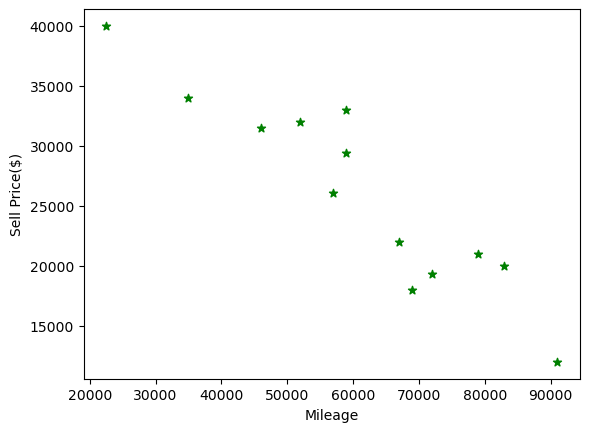

In [17]:
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(df1.Mileage,df1['Sell Price($)'], marker = "*", color = 'green')

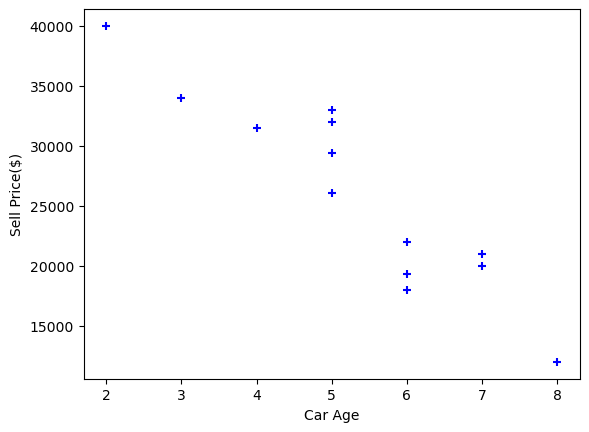

In [18]:
plt.xlabel("Car Age")
plt.ylabel("Sell Price($)")
plt.scatter(df1['Age(yrs)'], df1['Sell Price($)'], marker = "+", color = 'blue')

In [ ]:
'''Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship 
between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)'''

In [ ]:
'''The approach we are going to use here is to split available data in two sets

1. Training: We will train our model on this dataset
2. Testing: We will use this subset to make actual predictions using trained model
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples 
for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam 
paper as you tought the students in the class.'''

In [19]:
X = df1[['Mileage','Age(yrs)']]

In [20]:
y = df1[['Sell Price($)']]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [22]:
X_train

,Mileage,Age(yrs)
0,69000,6
1,35000,3
3,22500,2
5,59000,5
12,59000,5
9,67000,6
2,57000,5
11,79000,7
6,52000,5


In [23]:
X_test

,Mileage,Age(yrs)
10,83000,7
8,91000,8
4,46000,4
7,72000,6


In [24]:
y_train

,Sell Price($)
0,18000
1,34000
3,40000
5,29400
12,33000
9,22000
2,26100
11,21000
6,32000


In [25]:
y_test

,Sell Price($)
10,20000
8,12000
4,31500
7,19300


In [26]:
#Lets run linear regression model now
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [27]:
X_test

,Mileage,Age(yrs)
10,83000,7
8,91000,8
4,46000,4
7,72000,6


In [34]:
clf.predict(X_test)

array([[18552.00693756],
       [15427.97324083],
       [31895.61446977],
       [22592.54212091]])

In [35]:
clf.score(X_test, y_test)

0.8724456880819187

In [36]:
#random_state argument
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
3,22500,2
7,72000,6
11,79000,7
6,52000,5
